# Importing relevant libraries

In [1]:
#libraries for dataframes and linear algebra & maths
import numpy as np
import pandas as pd
import math

In [2]:
#I need to read files from my local computer directories
import sys
import os
from os import listdir

In [5]:
#deeplearning and machine learning libraries

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


In [6]:
#for visual effects and plotting, counters
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
import cv2

# Reading and loading data from local machine

In [111]:
#defining glob vars for data
data = []
data_dir = "/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/grayscale/"
train_dir = os.path.join(data_dir)
print(train_dir)

/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/grayscale/


In [112]:
labels = []
for directory in os.listdir(train_dir):
  labels.append(directory)
print(labels)
print(str(len(labels)) + " classes")

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [113]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) #gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [114]:
train_data = []
try:
    #print("[INFO] Loading images ...")
    #root_dir = listdir()
    for directory in train_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            train_dir.remove(directory)


    for defects_id, sp in enumerate(labels):
        for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train

[INFO] Image loading completed


,File,DiseaseID,Disease Type
0,Strawberry___healthy/8f558908-aa1b-4a86-855a-5...,0,Strawberry___healthy
1,Strawberry___healthy/b8e9ed27-8e37-4214-9206-f...,0,Strawberry___healthy
2,Strawberry___healthy/abdd34a0-ab02-41e0-95a3-a...,0,Strawberry___healthy
3,Strawberry___healthy/d1aee44a-b6bb-45b9-b7b6-5...,0,Strawberry___healthy
4,Strawberry___healthy/3d28c3ea-8419-4e09-addd-2...,0,Strawberry___healthy
...,...,...,...
54300,Soybean___healthy/57c18b39-2a33-471f-91eb-a9ba...,37,Soybean___healthy
54301,Soybean___healthy/4fdc663e-a8ea-4d8a-801b-ef18...,37,Soybean___healthy
54302,Soybean___healthy/df807f13-078b-4a6a-9c23-e43e...,37,Soybean___healthy
54303,Soybean___healthy/60bf9858-951a-4b56-906e-3c1b...,37,Soybean___healthy


In [115]:
len(train_data)

54305

In [118]:
#reshuffling the sample as DiseaseID was sorted by 0....37
train = train.sample(frac=1, random_state=42) 
train.index = np.arange(len(train)) # Resetting index
train

,File,DiseaseID,Disease Type
0,Tomato___Late_blight/4fd803b3-c615-4d9e-9bee-5...,8,Tomato___Late_blight
1,Apple___healthy/8d45fcf9-d1c1-47b6-be37-6e3d2f...,34,Apple___healthy
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus/8026acb...,24,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,Tomato___Septoria_leaf_spot/69624cd3-6e0a-4853...,30,Tomato___Septoria_leaf_spot
4,Strawberry___Leaf_scorch/ee921a9c-1761-4859-85...,35,Strawberry___Leaf_scorch
...,...,...,...
54300,"Pepper,_bell___healthy/c6dfe386-62c3-464d-8815...",10,"Pepper,_bell___healthy"
54301,Squash___Powdery_mildew/65483846-0b08-4a10-b45...,31,Squash___Powdery_mildew
54302,Tomato___Spider_mites Two-spotted_spider_mite/...,27,Tomato___Spider_mites Two-spotted_spider_mite
54303,Grape___Black_rot/6dc433e2-eb64-4e1d-8a79-12c5...,1,Grape___Black_rot


In [119]:
train['DiseaseID'].value_counts() #38 types of disease/healthy

11    5507
24    5357
37    5090
28    2297
16    2127
8     1909
31    1835
30    1771
27    1676
34    1645
22    1591
3     1502
10    1478
5     1404
20    1383
19    1192
1     1180
4     1162
35    1109
13    1076
14    1052
7     1000
2     1000
18    1000
29     997
26     985
12     952
23     854
25     630
33     621
32     513
0      456
17     423
9      373
21     371
6      360
15     275
36     152
Name: DiseaseID, dtype: int64

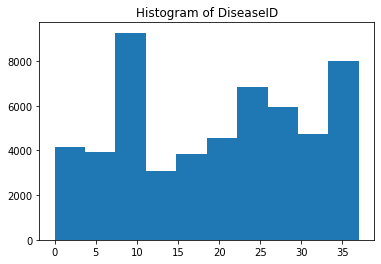

<Figure size 1080x1080 with 0 Axes>

In [207]:
plt.hist(train['DiseaseID'])
plt.title('Histogram of DiseaseID')
plt.figure(figsize=(15, 15))
plt.show()

In [121]:
#defining image helpers

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
# Loading a color image is the default flag

#resize image to target size

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

## Train-Test split

In [122]:
imagesize = 64

X_train = np.zeros((train.shape[0], imagesize, imagesize, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (imagesize, imagesize))


54305it [02:54, 311.55it/s]


In [123]:

display(X_train[0])
display(X_train[0].shape)

array([[[109., 109., 109.],
        [109., 109., 109.],
        [103., 103., 103.],
        ...,
        [162., 162., 162.],
        [165., 165., 165.],
        [163., 163., 163.]],

       [[107., 107., 107.],
        [107., 107., 107.],
        [109., 109., 109.],
        ...,
        [166., 166., 166.],
        [165., 165., 165.],
        [163., 163., 163.]],

       [[101., 101., 101.],
        [111., 111., 111.],
        [106., 106., 106.],
        ...,
        [162., 162., 162.],
        [168., 168., 168.],
        [165., 165., 165.]],

       ...,

       [[103., 103., 103.],
        [108., 108., 108.],
        [117., 117., 117.],
        ...,
        [176., 176., 176.],
        [175., 175., 175.],
        [178., 178., 178.]],

       [[111., 111., 111.],
        [109., 109., 109.],
        [113., 113., 113.],
        ...,
        [177., 177., 177.],
        [176., 176., 176.],
        [172., 172., 172.]],

       [[114., 114., 114.],
        [114., 114., 114.],
        [118., 1

(64, 64, 3)

In [124]:
# Normalize the data
X_train_norm = X_train / 255 
print('Train Shape: {}'.format(X_train_norm.shape))

Train Shape: (54305, 64, 64, 3)


In [125]:
# Flatten the images. Images are to be input as vector
X_train_fl_no = X_train_norm.reshape((-1, 4096))
print('Train Shape: {}'.format(X_train_fl_no.shape))
#test_images = test_images.reshape((-1, 784))

Train Shape: (162915, 4096)


In [126]:
Y_train = train['DiseaseID'].values
Y_train_labels = to_categorical(Y_train) #encoding into array with values-- 1 and 0

In [127]:
Y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [128]:
Y_train_labels.shape

(54305, 38)

In [65]:
# Normalize the data
Y_train_norm = (Y_train_labels/255)
#Y_train = Y_train_labels.reshape((-1, 784))


In [68]:
Y_train_norm.shape

(54305, 38)

In [101]:
X_train.shape

(54305, 64, 64, 3)

In [102]:
Y_train.shape

(54305,)

In [129]:
# Split the train and validation sets 
X_train, X_test, Y_train, Y_test = train_test_split(X_train_norm, Y_train_labels, test_size=0.2, random_state=42)

# Modeling with Keras

In [161]:
INPUT_SHAPE = (64, 64, 3)
def modeling():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(38, activation='softmax')
])

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.summary()
    return model

In [162]:
modeling().summary

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_68 (Batc (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_69 (Batc (None, 29, 29, 64)        116       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 64)      

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x15b6e5100>>

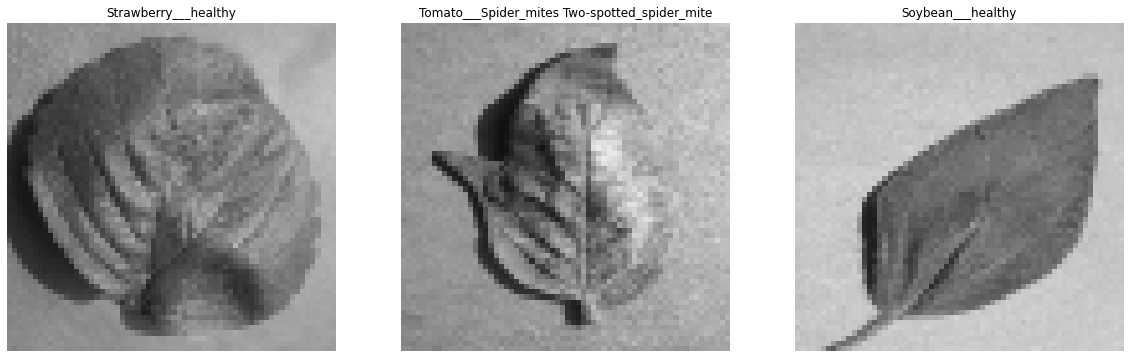

In [163]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(labels[np.argmax(Y_train[i])])

In [164]:
model = modeling()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_72 (Batc (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_73 (Batc (None, 29, 29, 64)        116       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 12, 12, 64)      

In [165]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
679/679 [==============================] - 447s 654ms/step - loss: 2.8378 - accuracy: 0.2513
Epoch 2/5
389/679 [================>.............] - ETA: 2:26 - loss: 1.7479 - accuracy: 0.4974

KeyboardInterrupt: 

In [144]:
EPOCHS = 20
model = modeling()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('detection-model-plant-official.h5', verbose=1, save_best_only=True)
custom=model.fit(X_train,Y_train,epochs=5,batch_size=64,callbacks=[annealer, checkpoint], validation_data=(X_test,Y_test))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_60 (Batc (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_61 (Batc (None, 29, 29, 64)        116       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 64)      

InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [64,15] and labels shape [2432]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/keras/backend.py:4944) ]] [Op:__inference_train_function_10536]

Errors may have originated from an input operation.
Input Source operations connected to node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:
 sparse_categorical_crossentropy/Reshape_1 (defined at /usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/keras/backend.py:4940)	
 sparse_categorical_crossentropy/Reshape (defined at /usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/keras/backend.py:3400)

Function call stack:
train_function


In [156]:
X_train.shape


(43444, 64, 64, 3)

In [155]:
Y_train.shape

(43444, 38)

In [158]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")



In [205]:
checkpoint1 = ModelCheckpoint('my-model-checkpoint1.h5', verbose=1, save_best_only=True)
reduce_LRP = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

In [194]:
len(X_train) // 64 
#checking steps_per_epoch,using // to get integer instead of float value through /

678

In [206]:
history1 = model.fit(
    aug.flow(X_train, Y_train, batch_size=64),
    validation_data=(X_test, Y_test),
    steps_per_epoch=len(X_train) // 64,
    epochs=25, verbose=1,
    callbacks=[reduce_LRP, checkpoint1]
    )

Epoch 1/25
678/678 [==============================] - 311s 458ms/step - loss: 0.3442 - accuracy: 0.8835 - val_loss: 0.6947 - val_accuracy: 0.7946

Epoch 00001: val_loss improved from inf to 0.69472, saving model to my-model-checkpoint1.h5
Epoch 2/25
678/678 [==============================] - 302s 445ms/step - loss: 0.3415 - accuracy: 0.8848 - val_loss: 1.1696 - val_accuracy: 0.7025

Epoch 00002: val_loss did not improve from 0.69472
Epoch 3/25
678/678 [==============================] - 2053s 3s/step - loss: 0.3383 - accuracy: 0.8852 - val_loss: 0.5940 - val_accuracy: 0.8207

Epoch 00003: val_loss improved from 0.69472 to 0.59396, saving model to my-model-checkpoint1.h5
Epoch 4/25
678/678 [==============================] - 292s 431ms/step - loss: 0.3303 - accuracy: 0.8875 - val_loss: 1.0962 - val_accuracy: 0.7171

Epoch 00004: val_loss did not improve from 0.59396
Epoch 5/25
678/678 [==============================] - 294s 433ms/step - loss: 0.3322 - accuracy: 0.8883 - val_loss: 1.0239 -

In [166]:
history = model.fit(
    aug.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_test, Y_test),
    steps_per_epoch=len(X_train) // 32,
    epochs=30, verbose=1,
    callbacks=[checkpoint]
    )

Epoch 1/30
1357/1357 [==============================] - 428s 314ms/step - loss: 1.7501 - accuracy: 0.4904 - val_loss: 1.7742 - val_accuracy: 0.4892

Epoch 00001: val_loss improved from inf to 1.77424, saving model to detection-model-plant-official.h5
Epoch 2/30
1357/1357 [==============================] - 419s 309ms/step - loss: 1.4998 - accuracy: 0.5533 - val_loss: 1.6291 - val_accuracy: 0.5133

Epoch 00002: val_loss improved from 1.77424 to 1.62914, saving model to detection-model-plant-official.h5
Epoch 3/30
1357/1357 [==============================] - 407s 300ms/step - loss: 1.3393 - accuracy: 0.5932 - val_loss: 1.1173 - val_accuracy: 0.6513

Epoch 00003: val_loss improved from 1.62914 to 1.11734, saving model to detection-model-plant-official.h5
Epoch 4/30
1357/1357 [==============================] - 399s 294ms/step - loss: 1.2147 - accuracy: 0.6261 - val_loss: 0.9896 - val_accuracy: 0.6835

Epoch 00004: val_loss improved from 1.11734 to 0.98965, saving model to detection-model-pl

In [188]:
checkpoint

In [171]:
#for first iteration with history
final_loss, final_accuracy = model.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

340/340 [==============================] - 26s 77ms/step - loss: 1.0014 - accuracy: 0.7111
Final Loss: 1.001437783241272, Final Accuracy: 0.7110763192176819


In [208]:
#forsecond iteration with history1
final_loss, final_accuracy = model.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

340/340 [==============================] - 36s 106ms/step - loss: 0.9120 - accuracy: 0.7593
Final Loss: 0.9120248556137085, Final Accuracy: 0.7593223452568054


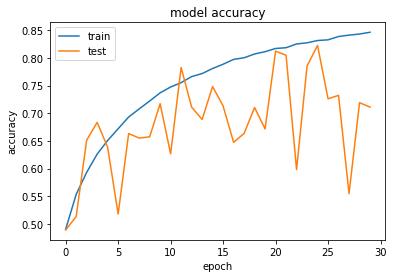

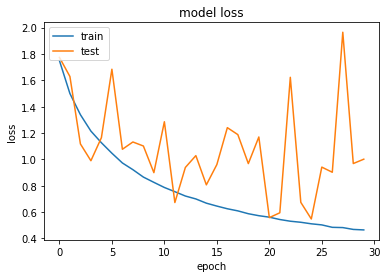

In [201]:
#for first iteration with history
#accuracy plot for epoch = 30
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss plot for epoch = 30
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

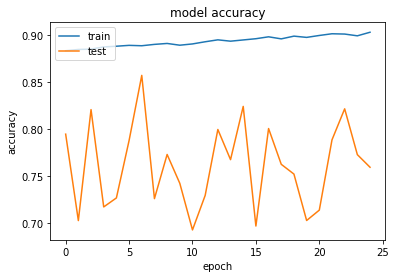

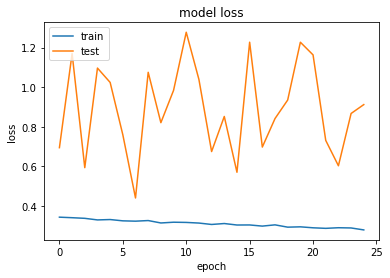

In [210]:
#forsecond iteration with history1
#accuracy plot for epoch = 25
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss plot for epoch = 25
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 255.29374999999993, 'Predicted')

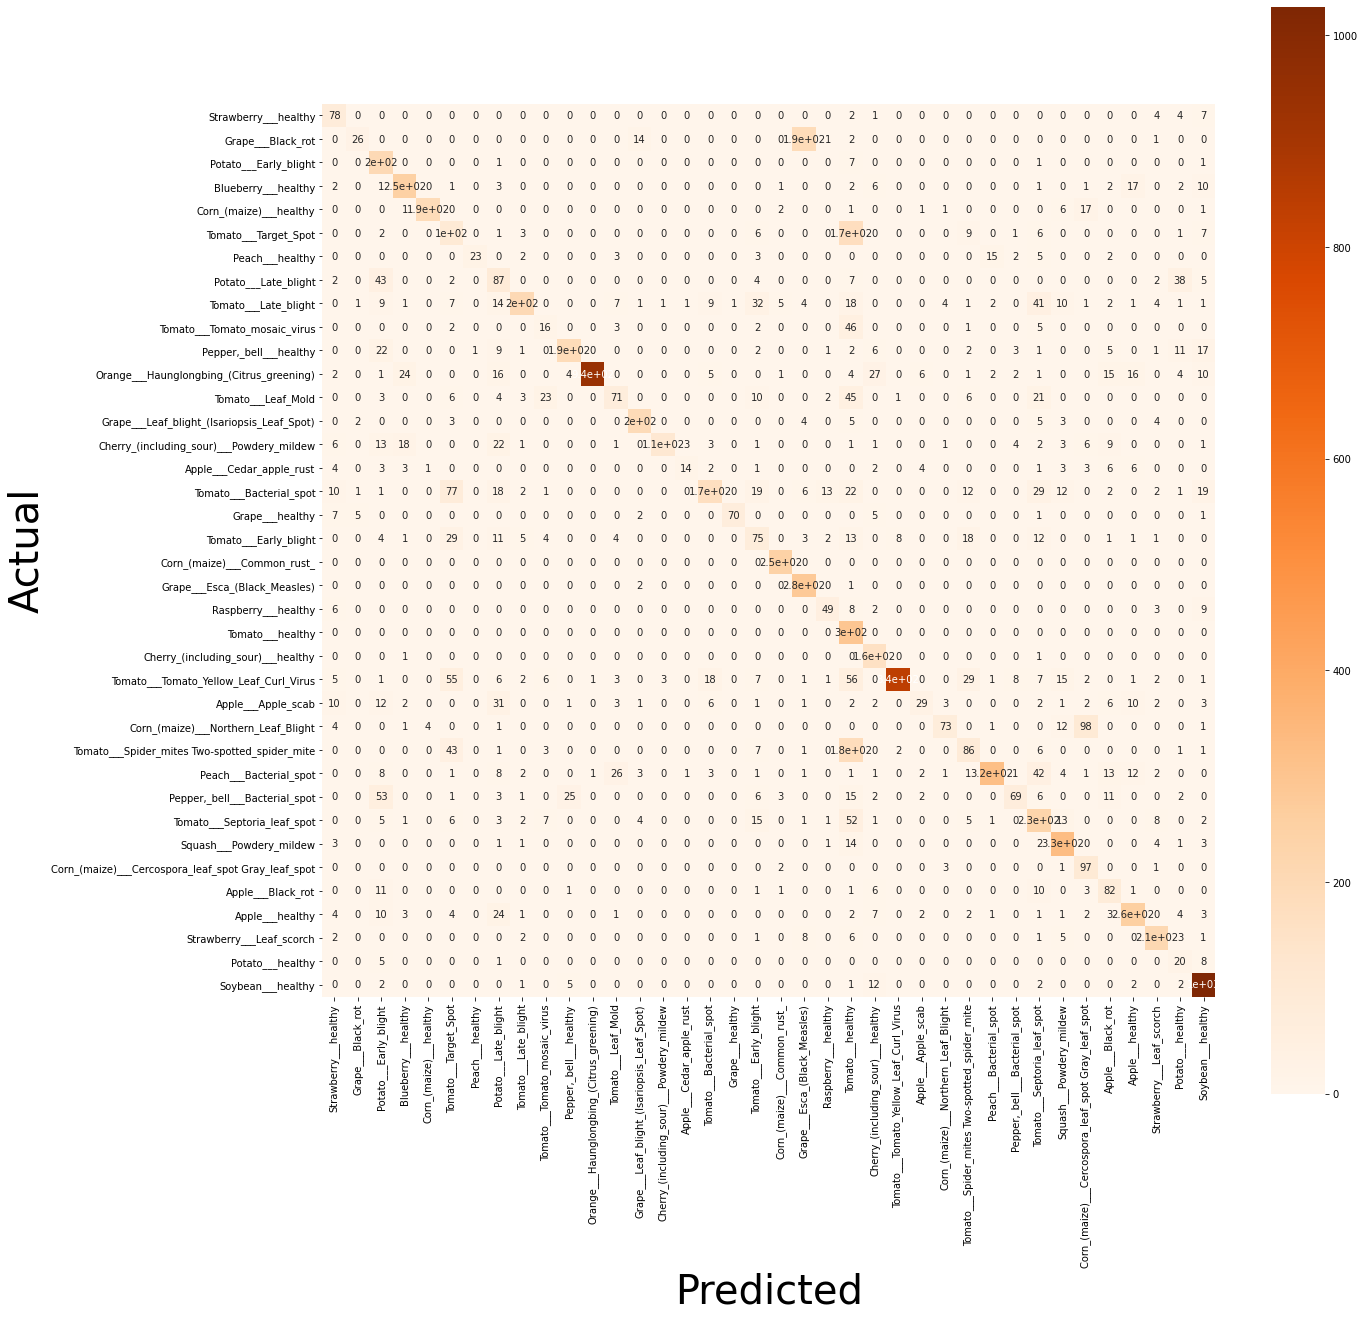

In [183]:
#for first iteration with history
Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(cm, cmap=plt.cm.Oranges, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

Text(0.5, 255.29374999999993, 'Predicted')

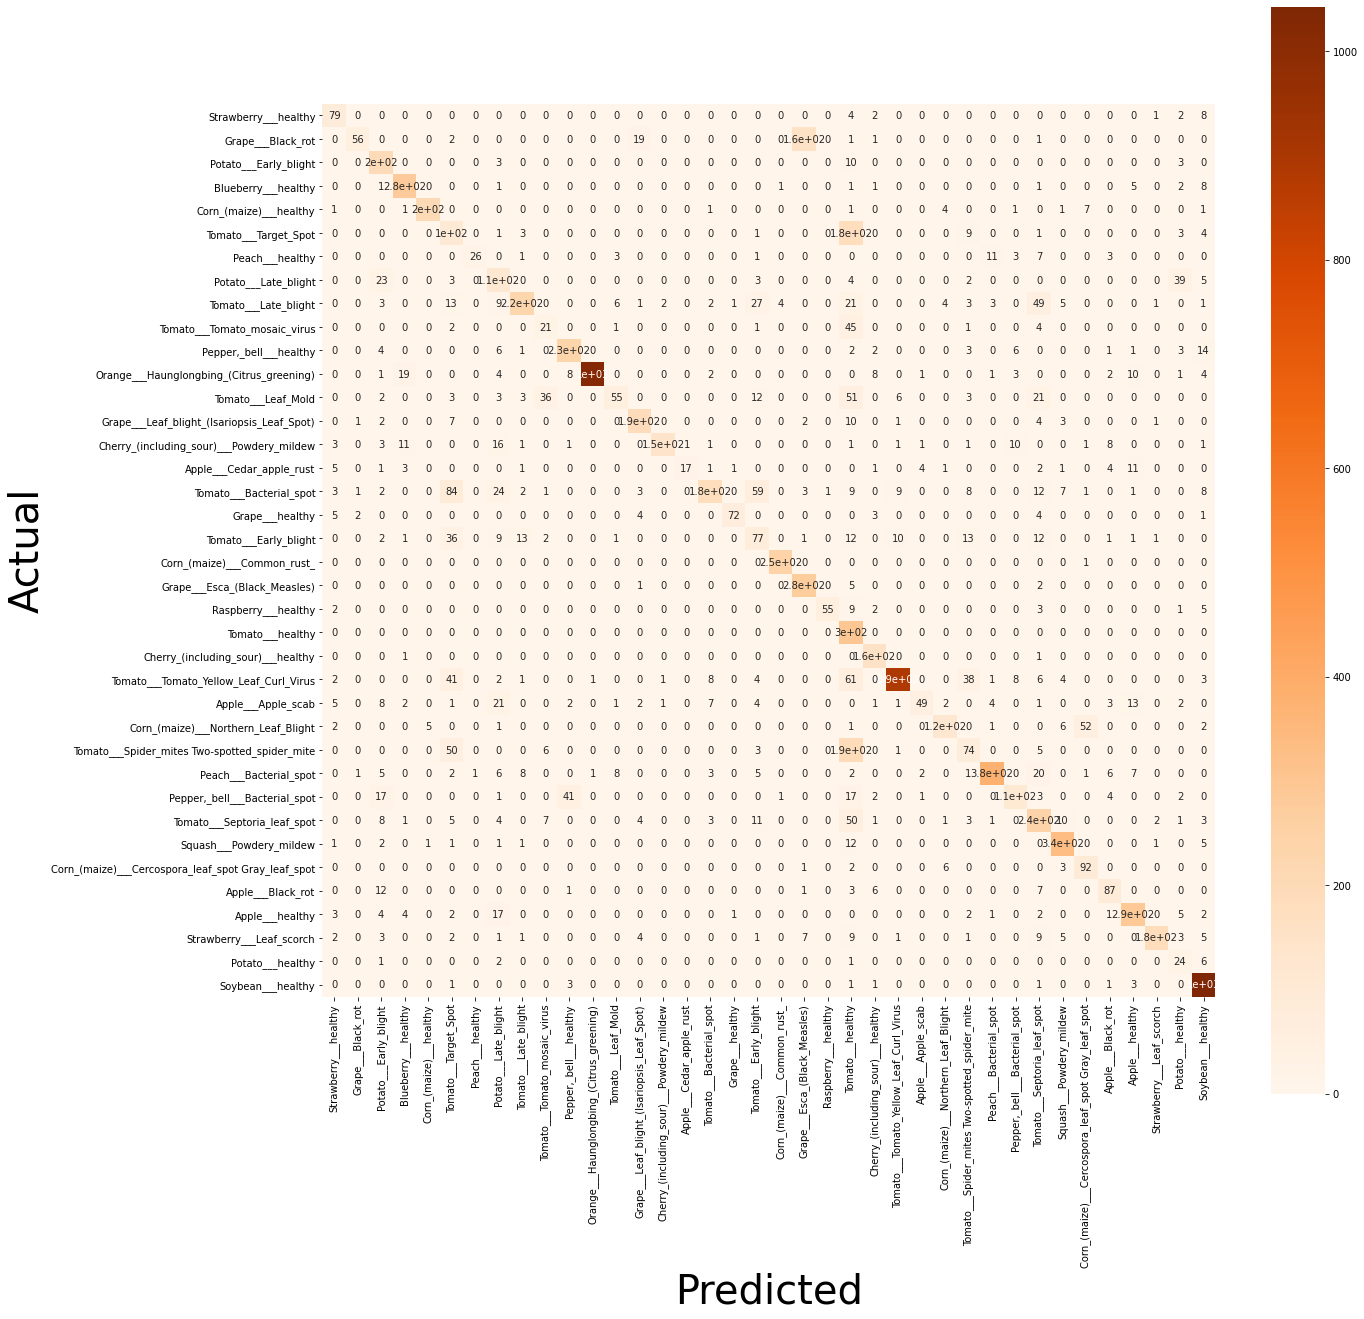

In [211]:
#for second iteration with history1
Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(cm, cmap=plt.cm.Oranges, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [179]:
#for first iteration
test=X_train[100]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[100])])

Prediction: Strawberry___Leaf_scorch
Result: Strawberry___Leaf_scorch


In [212]:
#for second iteration
test=X_train[100]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[100])])

Prediction: Strawberry___Leaf_scorch
Result: Strawberry___Leaf_scorch


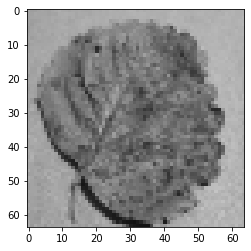

In [222]:
plt.imshow(X_train[100])

In [180]:
#for first iteration
test=X_train[5]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[5])])

Prediction: Tomato___Target_Spot
Result: Tomato___Late_blight


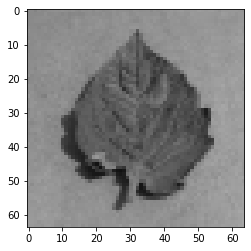

In [221]:
plt.imshow(X_train[5])

In [213]:
#for second iteration
test=X_train[5]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[5])])

Prediction: Tomato___Target_Spot
Result: Tomato___Late_blight


In [181]:
#for first iteration
test=X_train[8]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[8])])

Prediction: Soybean___healthy
Result: Blueberry___healthy


In [224]:
#for second iteration
test=X_train[8]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[8])])

Prediction: Blueberry___healthy
Result: Blueberry___healthy


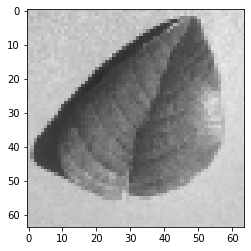

In [223]:
plt.imshow(X_train[8])

In [225]:
import pickle
# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('keras_model1.pkl', 'wb'))

[INFO] Saving model...


TypeError: cannot pickle 'weakref' object

In [226]:
from keras.models import load_model
model = load_model('my-model-checkpoint1.h5')

In [254]:
default_image_size = tuple((64, 64))

image_array = convert_image_to_array('/Users/deshdeepak/Potato1.JPG')
image_array
    

array([[[152., 152., 152.],
        [176., 176., 176.],
        [165., 165., 165.],
        ...,
        [130., 130., 130.],
        [139., 139., 139.],
        [135., 135., 135.]],

       [[149., 149., 149.],
        [147., 147., 147.],
        [156., 156., 156.],
        ...,
        [140., 140., 140.],
        [141., 141., 141.],
        [130., 130., 130.]],

       [[162., 162., 162.],
        [144., 144., 144.],
        [142., 142., 142.],
        ...,
        [131., 131., 131.],
        [130., 130., 130.],
        [126., 126., 126.]],

       ...,

       [[178., 178., 178.],
        [180., 180., 180.],
        [179., 179., 179.],
        ...,
        [156., 156., 156.],
        [155., 155., 155.],
        [157., 157., 157.]],

       [[171., 171., 171.],
        [175., 175., 175.],
        [181., 181., 181.],
        ...,
        [143., 143., 143.],
        [145., 145., 145.],
        [152., 152., 152.]],

       [[177., 177., 177.],
        [173., 173., 173.],
        [182., 1

In [255]:
np_image = np.array(image_array, dtype=np.float32)
print(np_image.dtype)

float32


In [256]:
np_image = np.expand_dims(np_image,0)


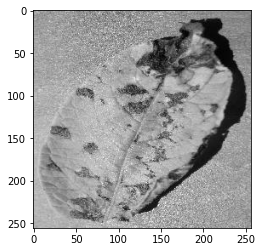

In [258]:
plt.imshow(plt.imread('/Users/deshdeepak/Potato1.JPG'))


In [259]:
result = model.predict_classes(np_image) 
print(result)

[32]


In [260]:
print(np_image.shape)

(1, 64, 64, 3)


In [318]:
model.evaluate(
  X_test,
    Y_test
)

340/340 [==============================] - 79s 222ms/step - loss: 0.4410 - accuracy: 0.8572


[0.44102585315704346, 0.8571954965591431]

In [341]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(labels)

In [342]:
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [413]:
def predict_disease(image_path):
    default_image_size = tuple((64, 64))
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float32)
    print(np_image.dtype)
    np_image = np.expand_dims(np_image,0)
    print(np_image.shape)
    test=np_image.reshape((-1,64,64,3))
    plt.imshow(plt.imread(image_path))
    np_image_norm = np_image/255.0 
    result = model.predict_classes(np_image) 
    print(result)
    list_result = list(result)
    loc = list_result[0]
    print("Prediction1: "+ labels[loc])
    print("Prediction from model1: " + labels[np.argmax((Y_test[loc]))])
    #print("Result: " + labels[np.argmax(Y_train[100])])
    #print(np.argmax(result))
    print("Prediction from model: ", (label_binarizer.classes_[result][0]))

float32
(1, 64, 64, 3)
[32]
Prediction1: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Prediction from model1: Tomato___Early_blight
Prediction from model:  Tomato___Septoria_leaf_spot


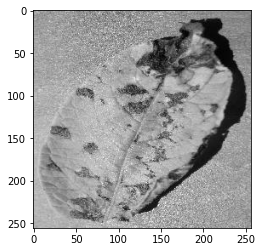

In [414]:
predict_disease('/Users/deshdeepak/Potato1.JPG')

float32
(1, 64, 64, 3)
[4]
Prediction1: Corn_(maize)___healthy
Prediction from model1: Blueberry___healthy
Prediction from model:  Blueberry___healthy


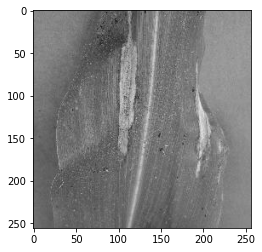

In [411]:
predict_disease('/Users/deshdeepak/cornleafblightgs.JPG')

float32
(1, 64, 64, 3)
[32]
Prediction1: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Prediction from model1: Tomato___Early_blight
Prediction from model:  Tomato___Septoria_leaf_spot


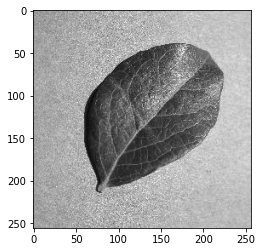

In [412]:
predict_disease('/Users/deshdeepak/blueberryhealthygs.JPG')

In [368]:
train['DiseaseID'].values

array([ 8, 34, 24, ..., 27,  1, 11])